In [146]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import linear_model, datasets
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.tree import export_graphviz

## Classificatie

In [76]:
# Inlezen van de dataset

dataset = pd.read_csv('Human_Resources.csv')
dataset.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [77]:
# one-hot encoding

dataset = pd.concat([dataset,pd.get_dummies(dataset['department'], prefix='department')],axis=1)
dataset.drop(['department'],axis=1, inplace=True)
dataset = pd.concat([dataset,pd.get_dummies(dataset['salary'], prefix='salary')],axis=1)
dataset.drop(['salary'],axis=1, inplace=True)

y = dataset['left'].values
X = dataset.drop(['left'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=4000, random_state=0)

print(X_test.shape)

# Om conversion warning te vermijden:

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# Scaling

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform((X_train))
X_test = scaler.transform(X_test)



(4000, 20)


In [3]:
dataset.drop(['id'],axis=1,inplace=True)

# Vervangen van B en M door 0 en 1 in de output diagnosis

dataset['diagnosis'].replace(['M', 'B'], [1, 0], inplace=True)

# Opsplitsen in features en targets

y = dataset['diagnosis'].values
X = dataset.drop(['diagnosis'],axis=1)

# Opsplitsen in training set en test set. Zorg ervoor dat er 150 samples in de test set zitten.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=150, random_state=0)


# Normalisatie van de features

# Om conversion warning te vermijden:

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# Scaling

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform((X_train))
X_test = scaler.transform(X_test)

In [78]:
model = LogisticRegression()
paramaters = [
                {'C' : np.arange(0.001,1000,100), 'solver':['liblinear']}    
                                                      
             ]

grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Best accuracy :  0.7887085038653934
Best parameters : {'C': 100.001, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3082
           1       0.58      0.35      0.44       918

    accuracy                           0.79      4000
   macro avg       0.70      0.64      0.65      4000
weighted avg       0.77      0.79      0.77      4000

[[2847  235]
 [ 597  321]]
79.2


In [80]:
# Decision tree

DTclassifier = DecisionTreeClassifier(min_samples_split=3,max_depth=3,class_weight='balanced')
DTclassifier.fit(X_train,y_train)

y_pred = DTclassifier.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      3082
           1       0.73      0.94      0.83       918

    accuracy                           0.91      4000
   macro avg       0.86      0.92      0.88      4000
weighted avg       0.92      0.91      0.91      4000

[[2769  313]
 [  52  866]]
90.875


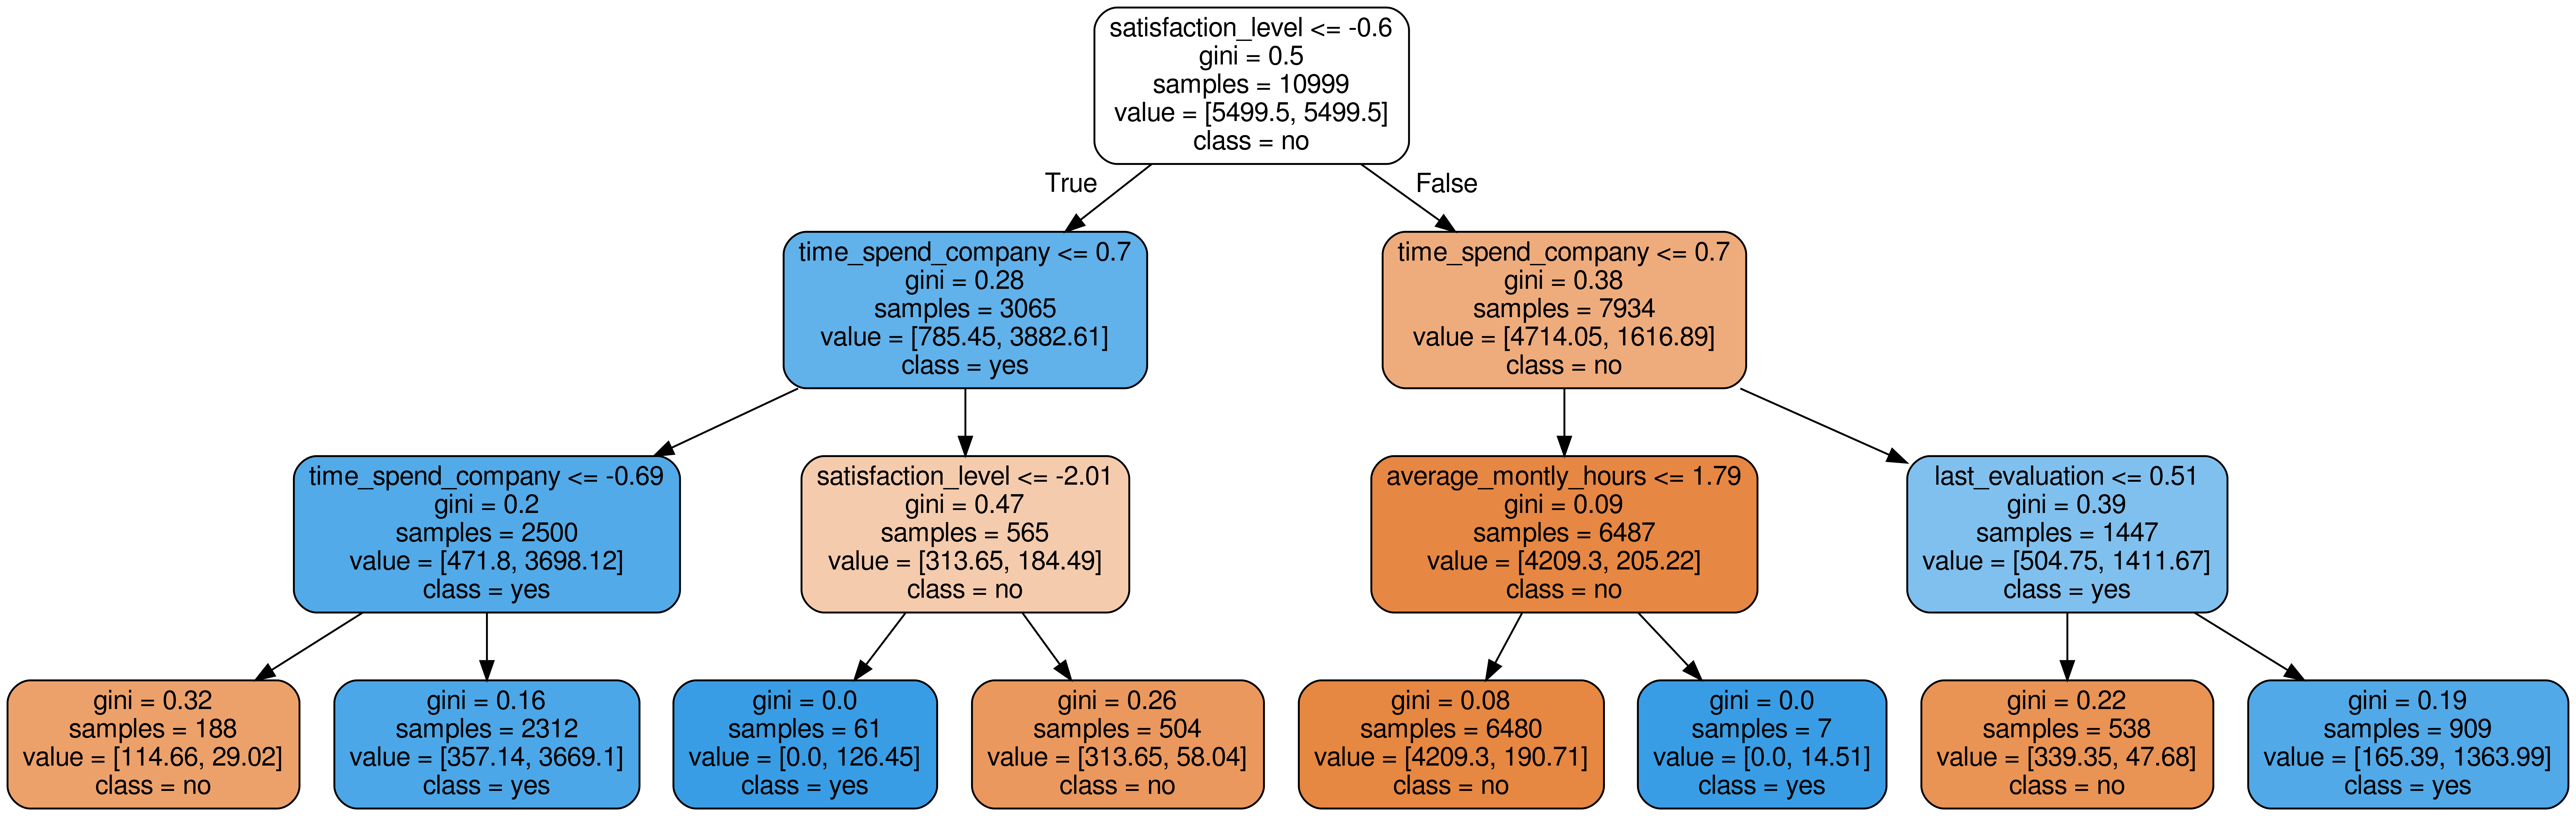

In [81]:
# Visualiseren van de decision tree
export_graphviz(DTclassifier, out_file='tree.dot', 
                feature_names =list(dataset.columns[0:-1]) ,
                class_names = ['no','yes'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)


# Convert to png using system command (requires Graphviz)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook

from IPython.display import Image

Image(filename = 'tree.png')



In [82]:
# Random Forest Classifier
number_of_trees = 500
max_number_of_features = 13

RFCmodel = RandomForestClassifier(n_estimators=number_of_trees, max_features=max_number_of_features,class_weight='balanced')


RFCmodel.fit(X_train,y_train)

print(RFCmodel.feature_importances_)

# Test Random Forest Classifier

y_pred = RFCmodel.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 




[0.35721246 0.11713848 0.08715925 0.12133924 0.28670835 0.00224016
 0.00056256 0.00119917 0.00139501 0.00143694 0.00142182 0.00082036
 0.00116236 0.0006569  0.00311115 0.00297918 0.00491964 0.00128207
 0.00443566 0.00281922]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3082
           1       0.99      0.97      0.98       918

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

[[3070   12]
 [  23  895]]
99.125


In [83]:
# Bagging met logistic regression

number_of_estimators = 50
complexity = 1e8
cart = LogisticRegression(C=complexity,solver='liblinear')


lregbagging = BaggingClassifier(base_estimator=cart, n_estimators=number_of_estimators)

lregbagging.fit(X_train,y_train)


y_pred = lregbagging.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3082
           1       0.57      0.35      0.43       918

    accuracy                           0.79      4000
   macro avg       0.70      0.64      0.65      4000
weighted avg       0.77      0.79      0.77      4000

[[2845  237]
 [ 598  320]]
79.125


In [88]:
# Adaboost

clf_adaboost = AdaBoostClassifier(n_estimators=50,learning_rate=0.90)
clf_adaboost.fit(X_train,y_train)

y_pred = clf_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3082
           1       0.93      0.92      0.92       918

    accuracy                           0.96      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.96      0.96      0.96      4000

[[3018   64]
 [  77  841]]
96.475


In [93]:
# Adaboost met logistic regression classifier

cart = LogisticRegression(C=1000,solver='liblinear')
logreg_adaboost = AdaBoostClassifier(base_estimator=cart,n_estimators=50,learning_rate=0.9) 
logreg_adaboost.fit(X_train,y_train)

y_pred = logreg_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3082
           1       0.51      0.27      0.35       918

    accuracy                           0.77      4000
   macro avg       0.66      0.59      0.61      4000
weighted avg       0.74      0.77      0.74      4000

[[2841  241]
 [ 672  246]]
77.17500000000001


In [104]:
# Gradient boosting

clf_gradientboost = GradientBoostingClassifier(n_estimators=600,learning_rate=0.95)

clf_gradientboost.fit(X_train,y_train)


y_pred = clf_gradientboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3082
           1       0.96      0.97      0.97       918

    accuracy                           0.99      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.99      0.99      0.99      4000

[[3047   35]
 [  24  894]]
98.52499999999999


In [126]:
#### Classificatie met XGBoost

from xgboost import XGBClassifier

clf_xgb = XGBClassifier(n_estimators=1000,max_depth=15)
clf_xgb.fit(X_train,y_train)

y_pred = clf_xgb.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

/home/wouter/miniconda3/envs/tensorflow2/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:14:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3082
           1       0.98      0.97      0.98       918

    accuracy                           0.99      4000
   macro avg       0.99      0.98      0.99      4000
weighted avg       0.99      0.99      0.99      4000

[[3066   16]
 [  23  895]]
99.02499999999999


In [167]:
# Stacking



estimators = [
    ('svc', SVC(C=10,kernel='rbf')),
    ('nb' , GaussianNB()),
    ('rfc', RandomForestClassifier(n_estimators = 100))
]
    
lr = LogisticRegression()  
    
stacked_model = StackingClassifier(
estimators=estimators, final_estimator=lr,cv=5,n_jobs=-1)    
    
stacked_model.fit(X_train,y_train)


y_pred = stacked_model.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3082
           1       0.99      0.97      0.98       918

    accuracy                           0.99      4000
   macro avg       0.99      0.98      0.99      4000
weighted avg       0.99      0.99      0.99      4000

[[3070   12]
 [  27  891]]
99.02499999999999


In [171]:
stacked_model.transform(X_test)

array([[ 9.23770457e-01,  6.97232721e-01,  1.00000000e+00],
       [-2.89609818e+00,  3.72273586e-01,  0.00000000e+00],
       [-2.86886948e+00,  6.94188302e-05,  1.00000000e-02],
       ...,
       [-2.70702727e+00,  3.29530113e-01,  0.00000000e+00],
       [-1.62473351e+00,  5.98661852e-01,  0.00000000e+00],
       [-1.51899626e+00,  7.25138012e-01,  1.00000000e-02]])

In [138]:
# TPOT

from tpot import TPOTClassifier

TP_model = TPOTClassifier(generations=5, population_size=20, cv=5, n_jobs = -1,scoring='accuracy')

TP_model.fit(X_train,y_train)

y_pred = TP_model.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

TP_model.export('best_TP_Model.py')

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3082
           1       0.99      0.97      0.98       918

    accuracy                           0.99      4000
   macro avg       0.99      0.98      0.99      4000
weighted avg       0.99      0.99      0.99      4000

[[3074    8]
 [  29  889]]
99.075


In [140]:
TP_model.evaluated_individuals_

{'BernoulliNB(input_matrix, BernoulliNB__alpha=0.1, BernoulliNB__fit_prior=True)': {'generation': 0,
  'mutation_count': 0,
  'crossover_count': 0,
  'predecessor': ('ROOT',),
  'operator_count': 1,
  'internal_cv_score': 0.7586144528504692},
 'GaussianNB(input_matrix)': {'generation': 0,
  'mutation_count': 0,
  'crossover_count': 0,
  'predecessor': ('ROOT',),
  'operator_count': 1,
  'internal_cv_score': 0.6639722601182355},
 'MLPClassifier(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=1.0, GradientBoostingClassifier__max_depth=1, GradientBoostingClassifier__max_features=0.25, GradientBoostingClassifier__min_samples_leaf=5, GradientBoostingClassifier__min_samples_split=11, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.8), MLPClassifier__alpha=0.001, MLPClassifier__learning_rate_init=0.01)': {'generation': 0,
  'mutation_count': 0,
  'crossover_count': 0,
  'predecessor': ('ROOT',),
  'operator_count': 2,
  

## Regressie

### Split criterium

In [3]:
dataset = pd.read_csv('Golf.csv')
dataset.head(14)

,Day,Outlook,Temp,Humidity,Wind,Players
0,1,Sunny,Hot,High,Weak,25
1,2,Sunny,Hot,High,Strong,30
2,3,Overcast,Hot,High,Weak,46
3,4,Rain,Mild,High,Weak,45
4,5,Rain,Cool,Normal,Weak,52
5,6,Rain,Cool,Normal,Strong,23
6,7,Overcast,Cool,Normal,Strong,43
7,8,Sunny,Mild,High,Weak,35
8,9,Sunny,Cool,Normal,Weak,38
9,10,Rain,Mild,Normal,Weak,46


In [13]:
# Splitsen volgens Outlook

# Variantie van het aantal spelers voor splitsing

var_tot = dataset['Players'].var()
print('De totale variantie bedraagt:', var_tot)

# Splitsen volgens outlook (Sunny, Overcast en Rain)
var_sunny = dataset[dataset['Outlook']=='Sunny'].Players.var()
nr_sunny = dataset[dataset['Outlook']=='Sunny'].Players.count()
print('Sunny:','variantie:',var_sunny,' aantal:',nr_sunny)

var_overcast = dataset[dataset['Outlook']=='Overcast'].Players.var()
nr_overcast = dataset[dataset['Outlook']=='Overcast'].Players.count()
print('Overcast:','variantie:',var_overcast,' aantal:',nr_overcast)

var_rain = dataset[dataset['Outlook']=='Rain'].Players.var()
nr_rain = dataset[dataset['Outlook']=='Rain'].Players.count()
print('Rain:','variantie:',var_sunny,' aantal:',nr_sunny)

var_comb = ((nr_sunny*var_sunny) + (nr_overcast*var_overcast) + (nr_rain*var_rain))/dataset['Players'].count()

print('Gewogen variantie na de split:', var_comb)

# Splitsen volgens wind

var_weak = dataset[dataset['Wind']=='Weak'].Players.var()
nr_weak = dataset[dataset['Wind']=='Weak'].Players.count()
print('weak wind:','variantie:',var_weak,' aantal:',nr_weak)

var_strong = dataset[dataset['Wind']=='Strong'].Players.var()
nr_strong = dataset[dataset['Wind']=='Strong'].Players.count()
print('strong wind:','variantie:',var_strong,' aantal:',nr_strong)

var_comb = ((nr_weak*var_weak) + (nr_strong*var_strong))/dataset['Players'].count()
print('Gewogen variantie na de split:', var_comb)

# Predictie op basis van enkel criterium outlook

print('gemiddelde bij zonnig weer:', dataset[dataset['Outlook']=='Sunny'].Players.mean() )
print('gemiddelde bij bewolkt weer:', dataset[dataset['Outlook']=='Overcast'].Players.mean() )
print('gemiddelde bij regen:', dataset[dataset['Outlook']=='Rain'].Players.mean() )

De totale variantie bedraagt: 93.56593406593407
Sunny: variantie: 75.69999999999999  aantal: 5
Overcast: variantie: 16.25  aantal: 4
Rain: variantie: 75.69999999999999  aantal: 5
Gewogen variantie na de split: 84.42857142857143
weak wind: variantie: 70.83928571428571  aantal: 8
strong wind: variantie: 134.66666666666669  aantal: 6
Gewogen variantie na de split: 98.1938775510204
gemiddelde bij zonnig weer: 35.2
gemiddelde bij bewolkt weer: 46.25
gemiddelde bij regen: 39.2


### Regressie via decision trees op de Bostong housing dataset

In [172]:
dataset = pd.read_csv('boston_housing.csv')

In [173]:
dataset.drop('CHAS', axis=1, inplace=True)
# Dataset opsplitsen in training en test set

from scipy import stats
dataset = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]
dataset.describe()

features = list(dataset.columns[:dataset.columns.size-1])
print(features)
X = dataset[features].values 
y= dataset['Price'].values

# Opdelen in training en test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PT', 'B', 'LSTAT']


In [174]:
from sklearn.preprocessing import PolynomialFeatures


# Aanmaken van de hogere orde features
graad = 2

poly = PolynomialFeatures(graad)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print('dimensie van X_train_poly: ',X_train_poly.shape)
print('dimensie van X_test_poly: ',X_test_poly.shape)


# met L2 regularisatie via Ridge regression
lregmodel_poly = Ridge(alpha=5,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)

print('R2 score op test set via L2: ',lregmodel_poly.score(X_test_poly,y_test))
# R2 -score via L2 op de trainingset
print('R2 score op training set via L2: ',lregmodel_poly.score(X_train_poly,y_train))



# met L1 regularisatie via Lasso regression
lregmodel_poly = Lasso(alpha=3,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)      
  
      
print('R2 score op test set via L1: ',lregmodel_poly.score(X_test_poly,y_test))
  
# R2 -score via L1 op de trainingset
print('R2 score op training set via L1: ',lregmodel_poly.score(X_train_poly,y_train)) 

dimensie van X_train_poly:  (295, 91)
dimensie van X_test_poly:  (146, 91)
R2 score op test set via L2:  0.8280172944518217
R2 score op training set via L2:  0.8961369699471798
R2 score op test set via L1:  0.8592830757971248
R2 score op training set via L1:  0.8761987185666626


/home/wouter/miniconda3/envs/tensorflow2/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 647428.7717571727, tolerance: 965.10547830971
  model = cd_fast.enet_coordinate_descent(


In [175]:
# Random Forest Regressor

RFR_model = RandomForestRegressor(n_estimators=150)
RFR_model.fit(X_train_poly,y_train)

RFR_model.score(X_test_poly,y_test)

0.8975704037918186